# **Inteligencia Artificial y Aprendizaje Automático**
## **Maestría en Inteligencia Artificial Aplicada**
### **Dr Luis Eduardo Falcón Morales**
### **Tecnológico de Monterrey**
## **Actividad Individual Semana 9: Pronósticos con Series de Tiempo**


#### **Nombre:** Josue Aguila Ramos
#### **Matrícula:** 01796400

In [17]:
#Librerias a utilizar

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from math import sqrt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler

In [5]:
!pip install prophet

     Month  Sales
0  1964-01   2815
1  1964-02   2672
2  1964-03   2755
3  1964-04   2721
4  1964-05   2946
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   105 non-null    object
 1   Sales   105 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB
None


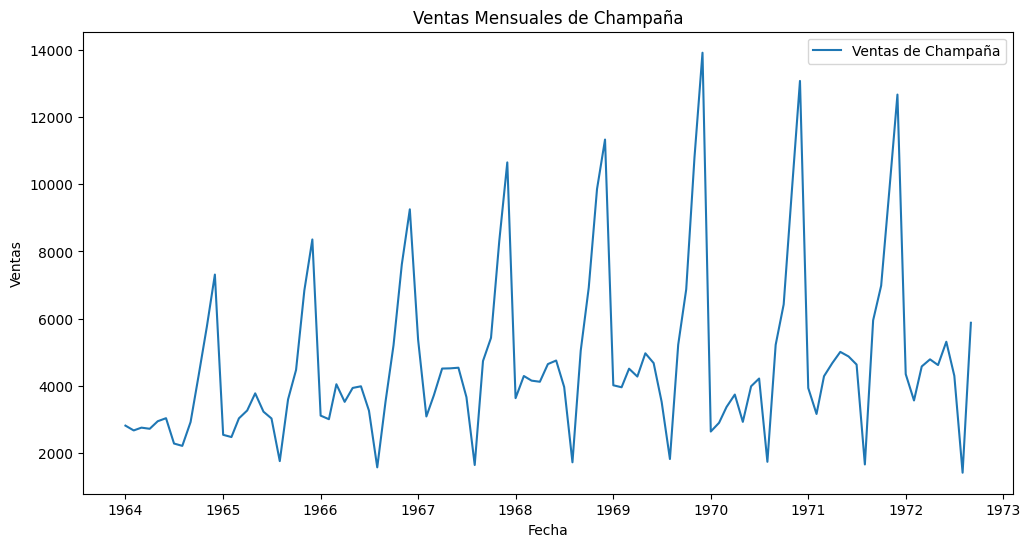

In [9]:
## ++++++++++ Incluye todas las celdas y líneas de código que requieras +++++++++++++++++++++++++

# Cargar los datos desde Google Colab (ajusta la ruta si es necesario)
file_path = '/content/monthly_champagne_sales.csv'  # Ajusta la ruta si es necesario
df = pd.read_csv(file_path)

# Inspeccionar los datos
print(df.head())
print(df.info())

# Convertir la columna de fecha a formato datetime y renombrar columnas si es necesario
df.columns = ['Month', 'Sales']
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Visualizar la serie de tiempo
plt.figure(figsize=(12, 6))
plt.plot(df, label='Ventas de Champaña')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Ventas Mensuales de Champaña')
plt.legend()
plt.show()


     Month  Sales
0  1964-01   2815
1  1964-02   2672
2  1964-03   2755
3  1964-04   2721
4  1964-05   2946
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   105 non-null    object
 1   Sales   105 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB
None


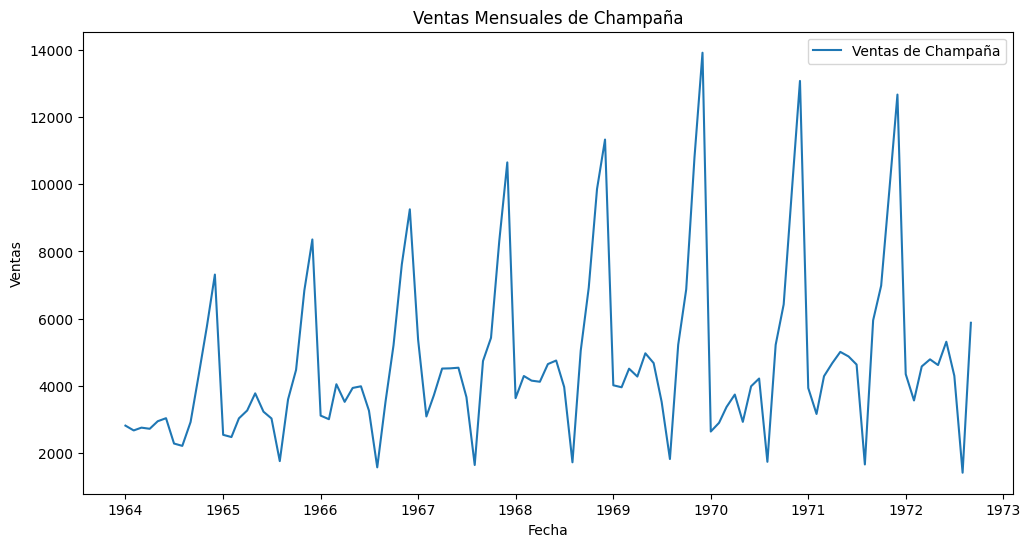

RMSE del Modelo Ingenuo: 2638.3566454256215


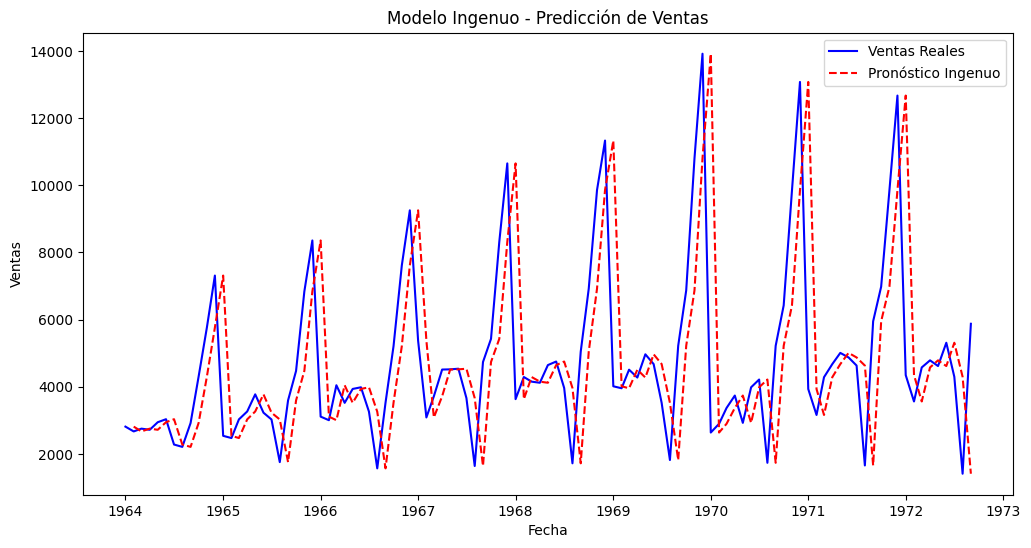

In [7]:
#Modelo ingenuo

# Cargar los datos desde Google Colab (ajusta la ruta si es necesario)
file_path = '/content/monthly_champagne_sales.csv'  # Ajusta la ruta si es necesario
df = pd.read_csv(file_path)

# Inspeccionar los datos
print(df.head())
print(df.info())

# Convertir la columna de fecha a formato datetime y renombrar columnas si es necesario
df.columns = ['Month', 'Sales']
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Visualizar la serie de tiempo
plt.figure(figsize=(12, 6))
plt.plot(df, label='Ventas de Champaña')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Ventas Mensuales de Champaña')
plt.legend()
plt.show()

# Modelo Ingenuo (Baseline)
df['Naive_Forecast'] = df['Sales'].shift(1)
rmse_naive = sqrt(mean_squared_error(df['Sales'][1:], df['Naive_Forecast'][1:]))
print(f'RMSE del Modelo Ingenuo: {rmse_naive}')

# Visualizar predicciones ingenuas
plt.figure(figsize=(12, 6))
plt.plot(df['Sales'], label='Ventas Reales', color='blue')
plt.plot(df['Naive_Forecast'], label='Pronóstico Ingenuo', linestyle='dashed', color='red')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Modelo Ingenuo - Predicción de Ventas')
plt.legend()
plt.show()


     Month  Sales
0  1964-01   2815
1  1964-02   2672
2  1964-03   2755
3  1964-04   2721
4  1964-05   2946
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   105 non-null    object
 1   Sales   105 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB
None


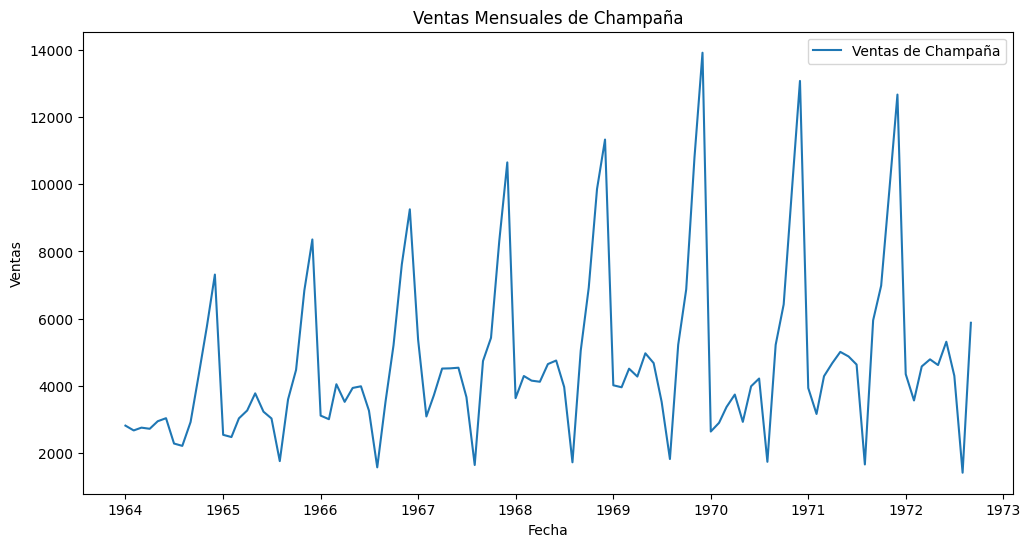

RMSE del Modelo Ingenuo: 2638.3566454256215


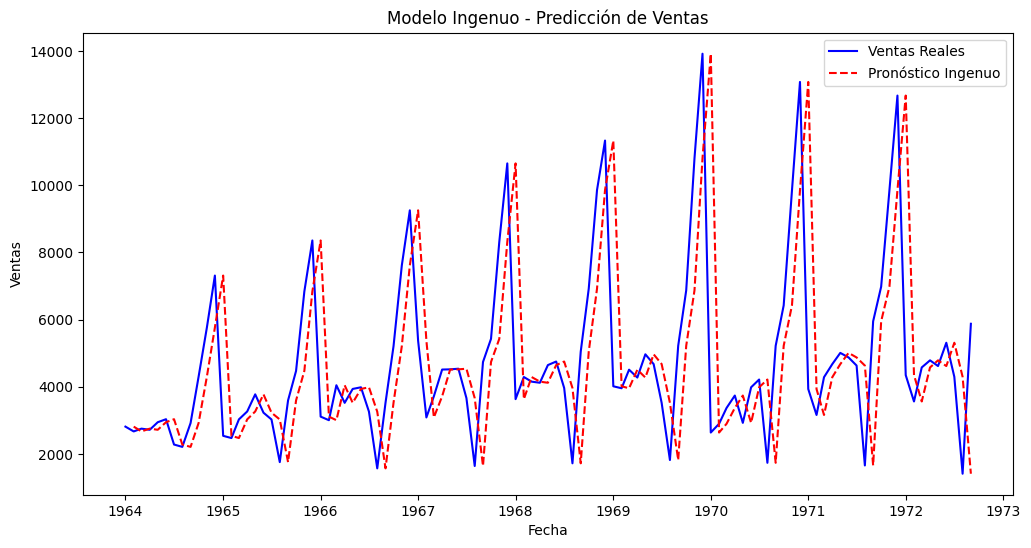

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


RMSE del Modelo ARIMA: 4406.646183174593


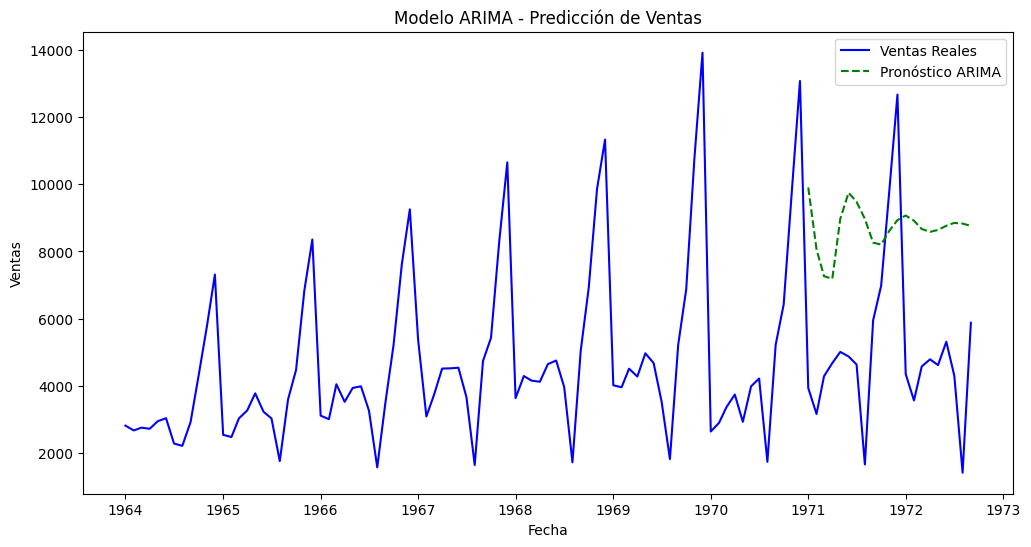

In [10]:
#Modelo Arima

# Cargar los datos desde Google Colab (ajusta la ruta si es necesario)
file_path = '/content/monthly_champagne_sales.csv'  # Ajusta la ruta si es necesario
df = pd.read_csv(file_path)

# Inspeccionar los datos
print(df.head())
print(df.info())

# Convertir la columna de fecha a formato datetime y renombrar columnas si es necesario
df.columns = ['Month', 'Sales']
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Visualizar la serie de tiempo
plt.figure(figsize=(12, 6))
plt.plot(df, label='Ventas de Champaña')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Ventas Mensuales de Champaña')
plt.legend()
plt.show()

# Modelo Ingenuo (Baseline)
df['Naive_Forecast'] = df['Sales'].shift(1)
rmse_naive = sqrt(mean_squared_error(df['Sales'][1:], df['Naive_Forecast'][1:]))
print(f'RMSE del Modelo Ingenuo: {rmse_naive}')

# Visualizar predicciones ingenuas
plt.figure(figsize=(12, 6))
plt.plot(df['Sales'], label='Ventas Reales', color='blue')
plt.plot(df['Naive_Forecast'], label='Pronóstico Ingenuo', linestyle='dashed', color='red')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Modelo Ingenuo - Predicción de Ventas')
plt.legend()
plt.show()

# Modelo ARIMA
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Ajustar modelo ARIMA
model_arima = ARIMA(train['Sales'], order=(5,1,0))  # Parámetros p,d,q ajustables
model_arima_fit = model_arima.fit()

# Pronósticos
forecast_arima = model_arima_fit.forecast(steps=len(test))

# Evaluación del modelo
rmse_arima = sqrt(mean_squared_error(test['Sales'], forecast_arima))
print(f'RMSE del Modelo ARIMA: {rmse_arima}')

# Visualizar predicciones ARIMA
plt.figure(figsize=(12, 6))
plt.plot(df['Sales'], label='Ventas Reales', color='blue')
plt.plot(test.index, forecast_arima, label='Pronóstico ARIMA', linestyle='dashed', color='green')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Modelo ARIMA - Predicción de Ventas')
plt.legend()
plt.show()


     Month  Sales
0  1964-01   2815
1  1964-02   2672
2  1964-03   2755
3  1964-04   2721
4  1964-05   2946
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   105 non-null    object
 1   Sales   105 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB
None


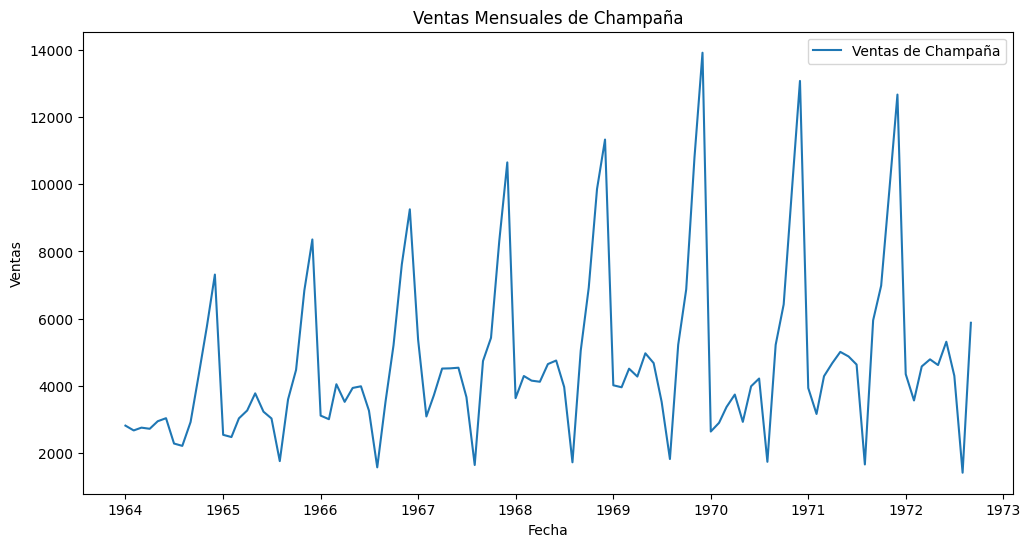

RMSE del Modelo Ingenuo: 2638.3566454256215


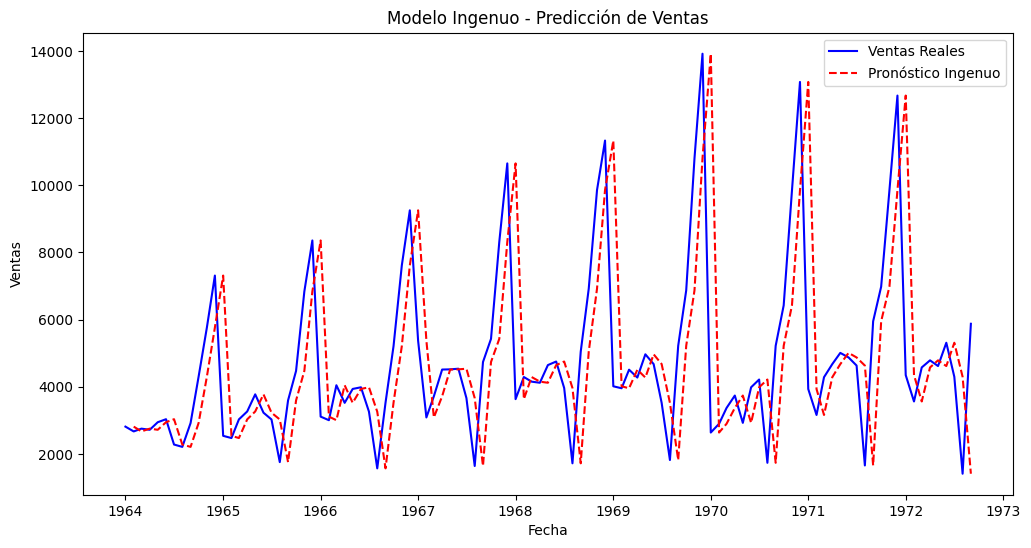

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


RMSE del Modelo ARIMA: 4406.646183174593


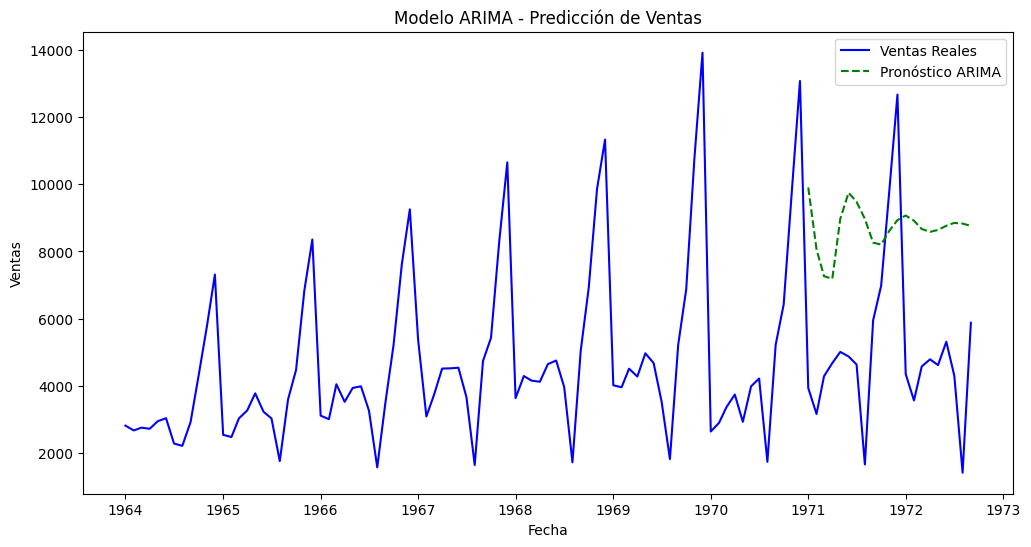

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplie9qjmf/qv1x_68j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplie9qjmf/mg1y4cf0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4372', 'data', 'file=/tmp/tmplie9qjmf/qv1x_68j.json', 'init=/tmp/tmplie9qjmf/mg1y4cf0.json', 'output', 'file=/tmp/tmplie9qjmf/prophet_modelvs17_io7/prophet_model-20250310153408.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:34:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:34:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/p

RMSE del Modelo Prophet: 501.7967579275434


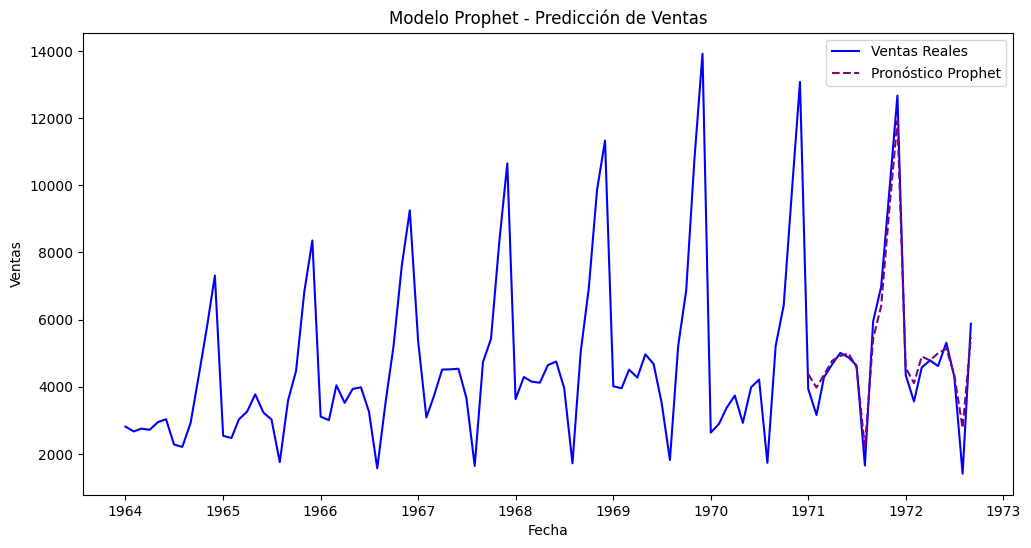

In [12]:
#Modelo prophet

# Cargar los datos desde Google Colab (ajusta la ruta si es necesario)
file_path = '/content/monthly_champagne_sales.csv'  # Ajusta la ruta si es necesario
df = pd.read_csv(file_path)

# Inspeccionar los datos
print(df.head())
print(df.info())

# Convertir la columna de fecha a formato datetime y renombrar columnas si es necesario
df.columns = ['Month', 'Sales']
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Visualizar la serie de tiempo
plt.figure(figsize=(12, 6))
plt.plot(df, label='Ventas de Champaña')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Ventas Mensuales de Champaña')
plt.legend()
plt.show()

# Modelo Ingenuo (Baseline)
df['Naive_Forecast'] = df['Sales'].shift(1)
rmse_naive = sqrt(mean_squared_error(df['Sales'][1:], df['Naive_Forecast'][1:]))
print(f'RMSE del Modelo Ingenuo: {rmse_naive}')

# Visualizar predicciones ingenuas
plt.figure(figsize=(12, 6))
plt.plot(df['Sales'], label='Ventas Reales', color='blue')
plt.plot(df['Naive_Forecast'], label='Pronóstico Ingenuo', linestyle='dashed', color='red')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Modelo Ingenuo - Predicción de Ventas')
plt.legend()
plt.show()

# Modelo ARIMA
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Ajustar modelo ARIMA
model_arima = ARIMA(train['Sales'], order=(5,1,0))  # Parámetros p,d,q ajustables
model_arima_fit = model_arima.fit()

# Pronósticos
forecast_arima = model_arima_fit.forecast(steps=len(test))

# Evaluación del modelo
rmse_arima = sqrt(mean_squared_error(test['Sales'], forecast_arima))
print(f'RMSE del Modelo ARIMA: {rmse_arima}')

# Visualizar predicciones ARIMA
plt.figure(figsize=(12, 6))
plt.plot(df['Sales'], label='Ventas Reales', color='blue')
plt.plot(test.index, forecast_arima, label='Pronóstico ARIMA', linestyle='dashed', color='green')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Modelo ARIMA - Predicción de Ventas')
plt.legend()
plt.show()

# Modelo Prophet
prophet_df = df.reset_index()[['Month', 'Sales']]
prophet_df.columns = ['ds', 'y']  # Prophet requiere nombres específicos de columnas

model_prophet = Prophet()
model_prophet.fit(prophet_df)

future = model_prophet.make_future_dataframe(periods=len(test), freq='M')
forecast_prophet = model_prophet.predict(future)

# Extraer predicciones para el conjunto de prueba
forecast_prophet_test = forecast_prophet[['ds', 'yhat']].set_index('ds').loc[test.index]

# Evaluación del modelo Prophet
rmse_prophet = sqrt(mean_squared_error(test['Sales'], forecast_prophet_test['yhat']))
print(f'RMSE del Modelo Prophet: {rmse_prophet}')

# Visualizar predicciones Prophet
plt.figure(figsize=(12, 6))
plt.plot(df['Sales'], label='Ventas Reales', color='blue')
plt.plot(forecast_prophet_test.index, forecast_prophet_test['yhat'], label='Pronóstico Prophet', linestyle='dashed', color='purple')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Modelo Prophet - Predicción de Ventas')
plt.legend()
plt.show()


In [15]:
!pip install scikit-learn

     Month  Sales
0  1964-01   2815
1  1964-02   2672
2  1964-03   2755
3  1964-04   2721
4  1964-05   2946
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   105 non-null    object
 1   Sales   105 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB
None


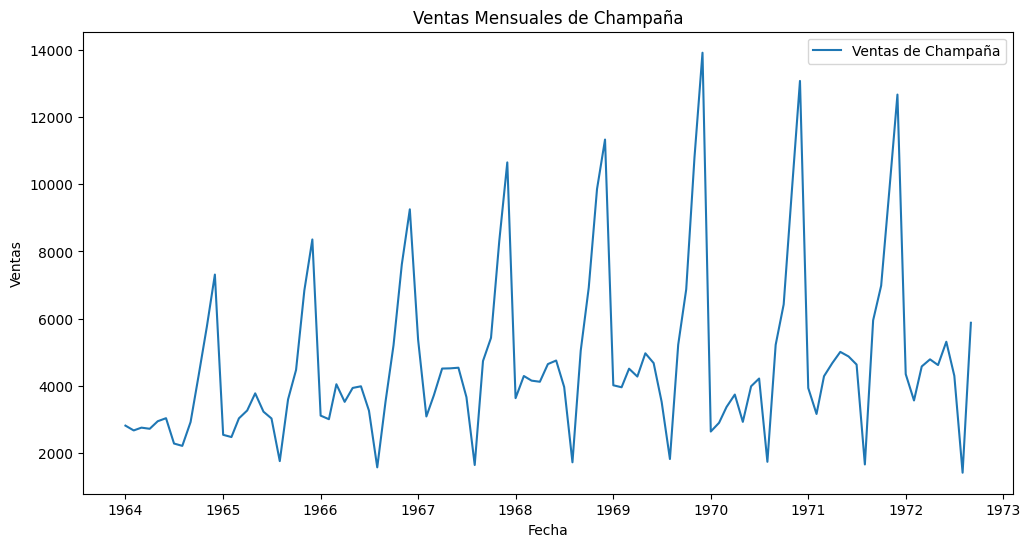

RMSE del Modelo Ingenuo: 2638.3566454256215


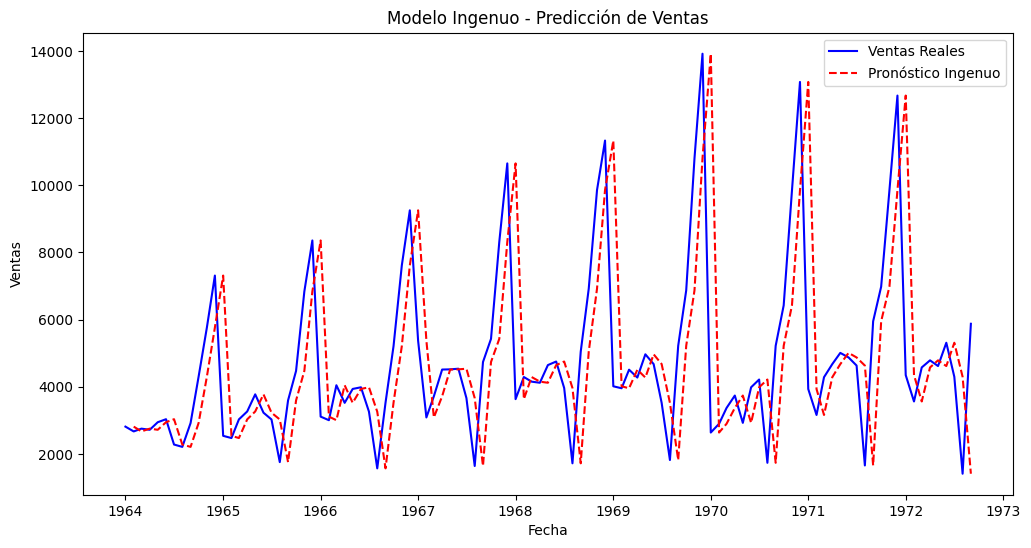

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


RMSE del Modelo ARIMA: 4406.646183174593


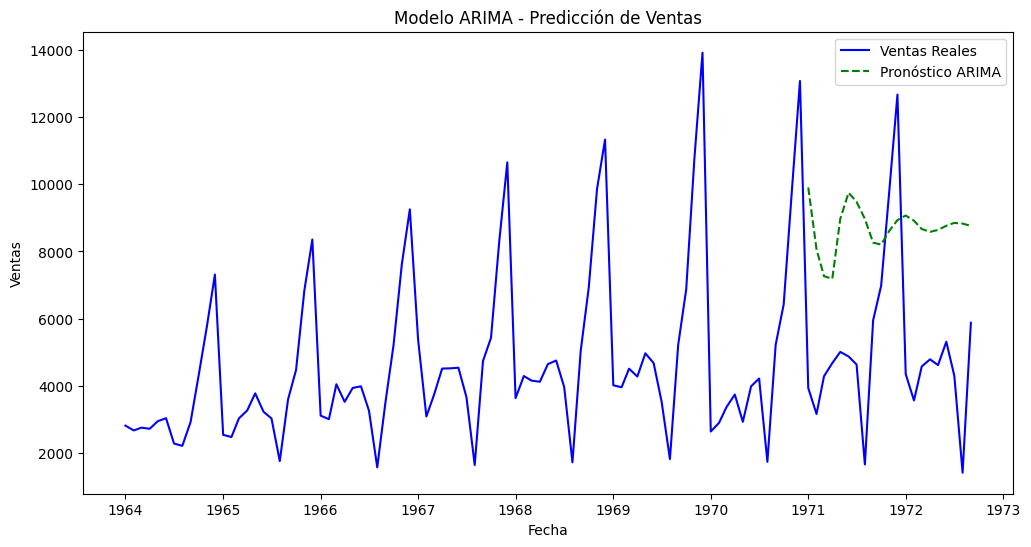

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplie9qjmf/rupzlocy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplie9qjmf/8ekso3r8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66362', 'data', 'file=/tmp/tmplie9qjmf/rupzlocy.json', 'init=/tmp/tmplie9qjmf/8ekso3r8.json', 'output', 'file=/tmp/tmplie9qjmf/prophet_modelweb7ltxj/prophet_model-20250310154356.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:43:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:43:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/

RMSE del Modelo Prophet: 501.7967579275434


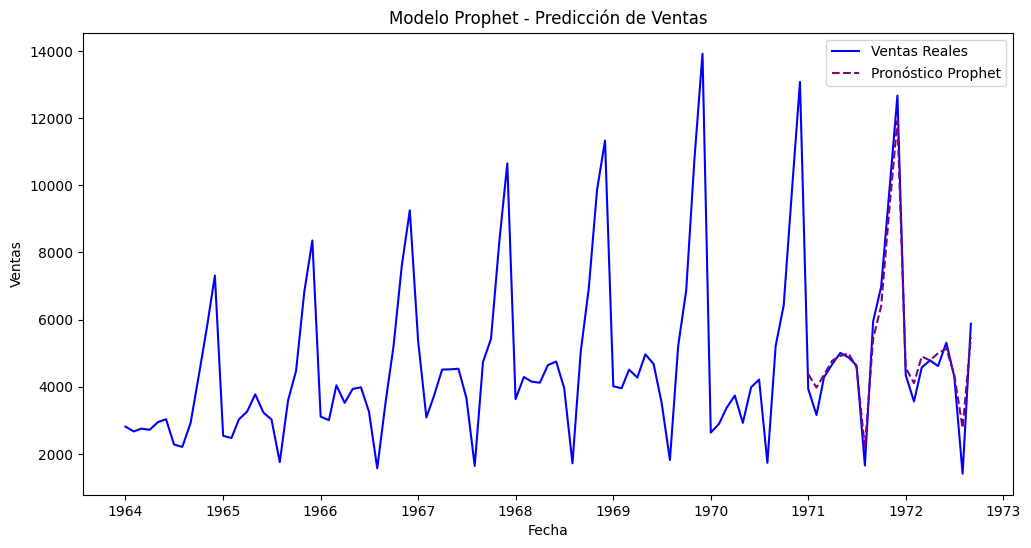

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0773
Epoch 2/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0435
Epoch 3/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0388
Epoch 4/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0450
Epoch 5/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0226
Epoch 6/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0222
Epoch 7/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0242
Epoch 8/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0245
Epoch 9/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0290
Epoch 10/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0201
Epoch 11/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0177
Epoch 12/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0148
Epoch 13/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0136
Epoch 14/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0071
Epoch 15/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0074
Epoch 16/20
93/93 ━━━━━━━━━━━━

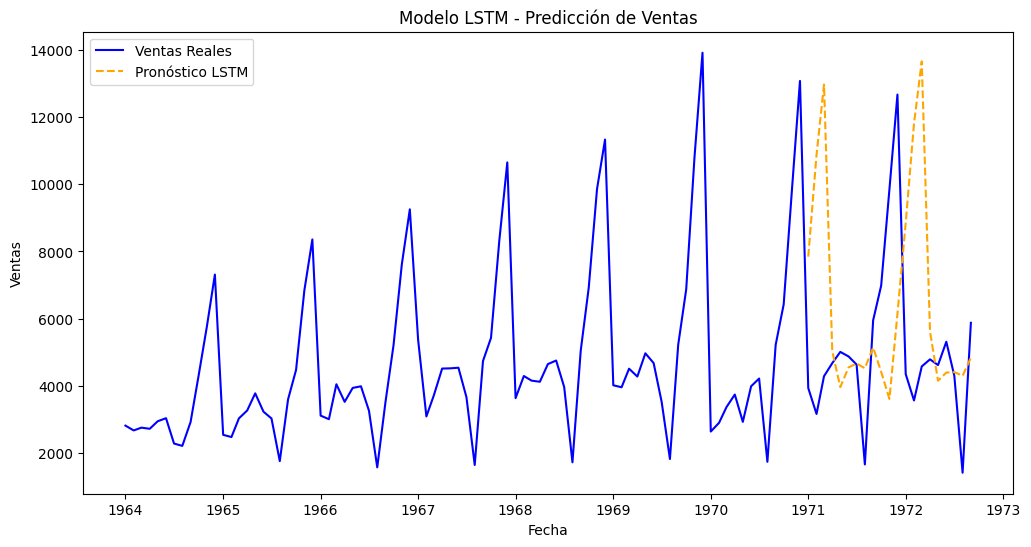

In [18]:
#Modelo LSTM

# Cargar los datos desde Google Colab (ajusta la ruta si es necesario)
file_path = '/content/monthly_champagne_sales.csv'  # Ajusta la ruta si es necesario
df = pd.read_csv(file_path)

# Inspeccionar los datos
print(df.head())
print(df.info())

# Convertir la columna de fecha a formato datetime y renombrar columnas si es necesario
df.columns = ['Month', 'Sales']
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Visualizar la serie de tiempo
plt.figure(figsize=(12, 6))
plt.plot(df, label='Ventas de Champaña')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Ventas Mensuales de Champaña')
plt.legend()
plt.show()

# Modelo Ingenuo (Baseline)
df['Naive_Forecast'] = df['Sales'].shift(1)
rmse_naive = sqrt(mean_squared_error(df['Sales'][1:], df['Naive_Forecast'][1:]))
print(f'RMSE del Modelo Ingenuo: {rmse_naive}')

# Visualizar predicciones ingenuas
plt.figure(figsize=(12, 6))
plt.plot(df['Sales'], label='Ventas Reales', color='blue')
plt.plot(df['Naive_Forecast'], label='Pronóstico Ingenuo', linestyle='dashed', color='red')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Modelo Ingenuo - Predicción de Ventas')
plt.legend()
plt.show()

# Modelo ARIMA
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Ajustar modelo ARIMA
model_arima = ARIMA(train['Sales'], order=(5,1,0))  # Parámetros p,d,q ajustables
model_arima_fit = model_arima.fit()

# Pronósticos
forecast_arima = model_arima_fit.forecast(steps=len(test))

# Evaluación del modelo
rmse_arima = sqrt(mean_squared_error(test['Sales'], forecast_arima))
print(f'RMSE del Modelo ARIMA: {rmse_arima}')

# Visualizar predicciones ARIMA
plt.figure(figsize=(12, 6))
plt.plot(df['Sales'], label='Ventas Reales', color='blue')
plt.plot(test.index, forecast_arima, label='Pronóstico ARIMA', linestyle='dashed', color='green')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Modelo ARIMA - Predicción de Ventas')
plt.legend()
plt.show()

# Modelo Prophet
prophet_df = df.reset_index()[['Month', 'Sales']]
prophet_df.columns = ['ds', 'y']  # Prophet requiere nombres específicos de columnas

model_prophet = Prophet()
model_prophet.fit(prophet_df)

future = model_prophet.make_future_dataframe(periods=len(test), freq='M')
forecast_prophet = model_prophet.predict(future)

# Extraer predicciones para el conjunto de prueba
forecast_prophet_test = forecast_prophet[['ds', 'yhat']].set_index('ds').loc[test.index]

# Evaluación del modelo Prophet
rmse_prophet = sqrt(mean_squared_error(test['Sales'], forecast_prophet_test['yhat']))
print(f'RMSE del Modelo Prophet: {rmse_prophet}')

# Visualizar predicciones Prophet
plt.figure(figsize=(12, 6))
plt.plot(df['Sales'], label='Ventas Reales', color='blue')
plt.plot(forecast_prophet_test.index, forecast_prophet_test['yhat'], label='Pronóstico Prophet', linestyle='dashed', color='purple')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Modelo Prophet - Predicción de Ventas')
plt.legend()
plt.show()

# Modelo LSTM
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[['Sales']])

# Generador de secuencias
time_steps = 12
generator = TimeseriesGenerator(df_scaled, df_scaled, length=time_steps, batch_size=1)

# Definir el modelo
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(time_steps, 1)))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')

# Entrenar el modelo
model_lstm.fit(generator, epochs=20, verbose=1)

# Predicción
predictions = []
first_eval_batch = df_scaled[-time_steps:]
current_batch = first_eval_batch.reshape((1, time_steps, 1))

for i in range(len(test)):
    current_pred = model_lstm.predict(current_batch)[0]
    predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

predictions = scaler.inverse_transform(predictions)

# Evaluación del modelo LSTM
rmse_lstm = sqrt(mean_squared_error(test['Sales'], predictions))
print(f'RMSE del Modelo LSTM: {rmse_lstm}')

# Visualizar predicciones LSTM
plt.figure(figsize=(12, 6))
plt.plot(df['Sales'], label='Ventas Reales', color='blue')
plt.plot(test.index, predictions, label='Pronóstico LSTM', linestyle='dashed', color='orange')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Modelo LSTM - Predicción de Ventas')
plt.legend()
plt.show()


     Month  Sales
0  1964-01   2815
1  1964-02   2672
2  1964-03   2755
3  1964-04   2721
4  1964-05   2946
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   105 non-null    object
 1   Sales   105 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB
None


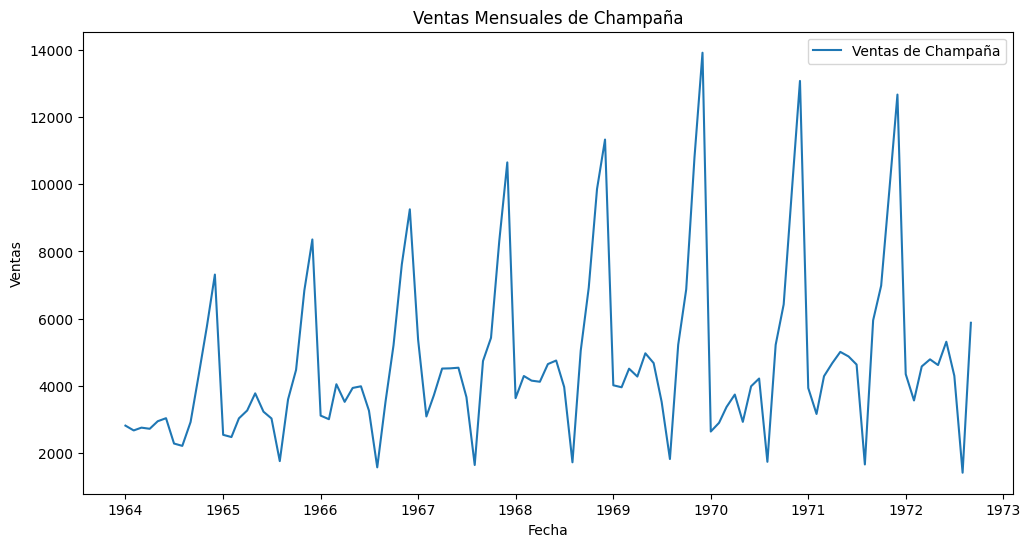

RMSE del Modelo Ingenuo: 2638.3566454256215


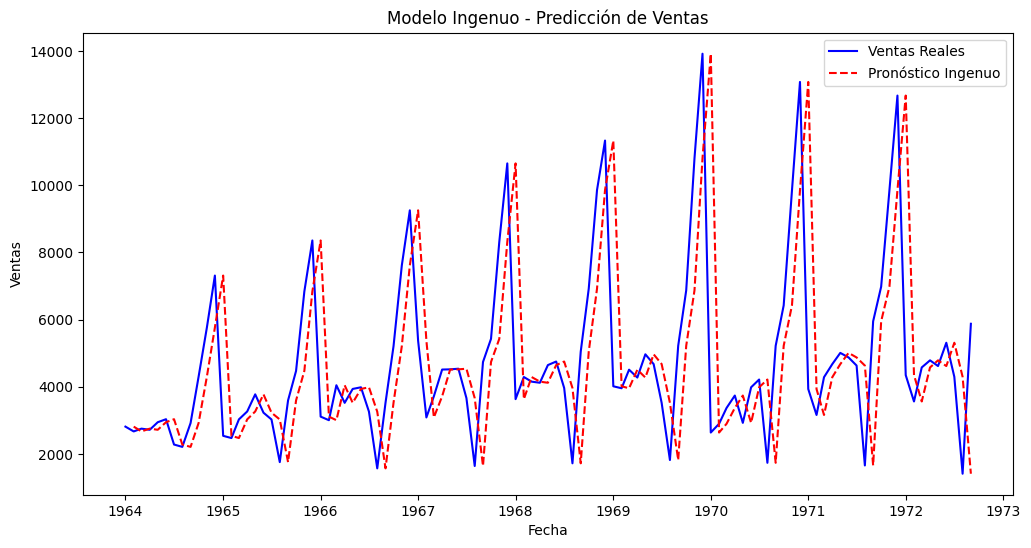

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


RMSE del Modelo ARIMA: 4406.646183174593


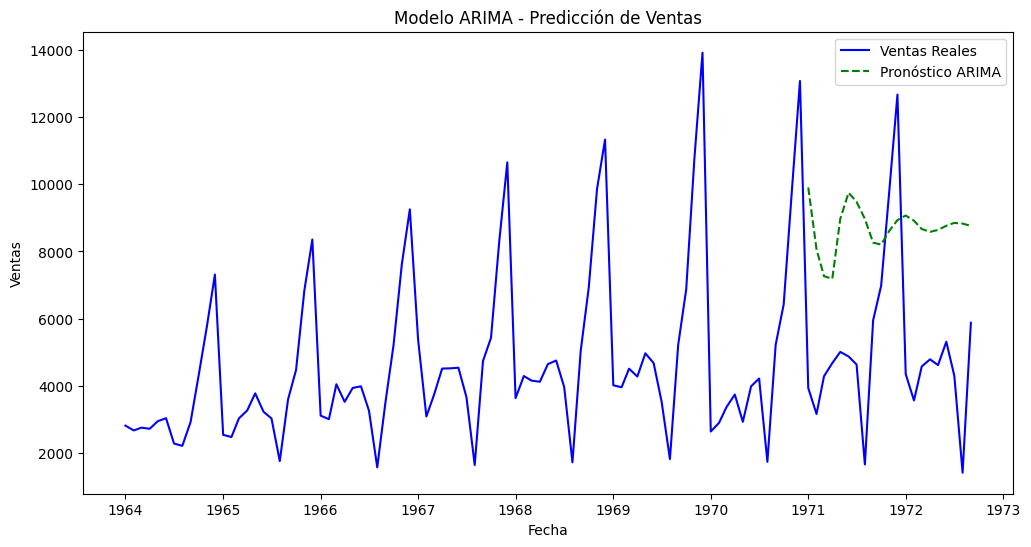

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplie9qjmf/6aa3sbl8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplie9qjmf/yawgumnh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44794', 'data', 'file=/tmp/tmplie9qjmf/6aa3sbl8.json', 'init=/tmp/tmplie9qjmf/yawgumnh.json', 'output', 'file=/tmp/tmplie9qjmf/prophet_modelu3qenswo/prophet_model-20250310154839.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:48:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:48:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/

RMSE del Modelo Prophet: 501.7967579275434


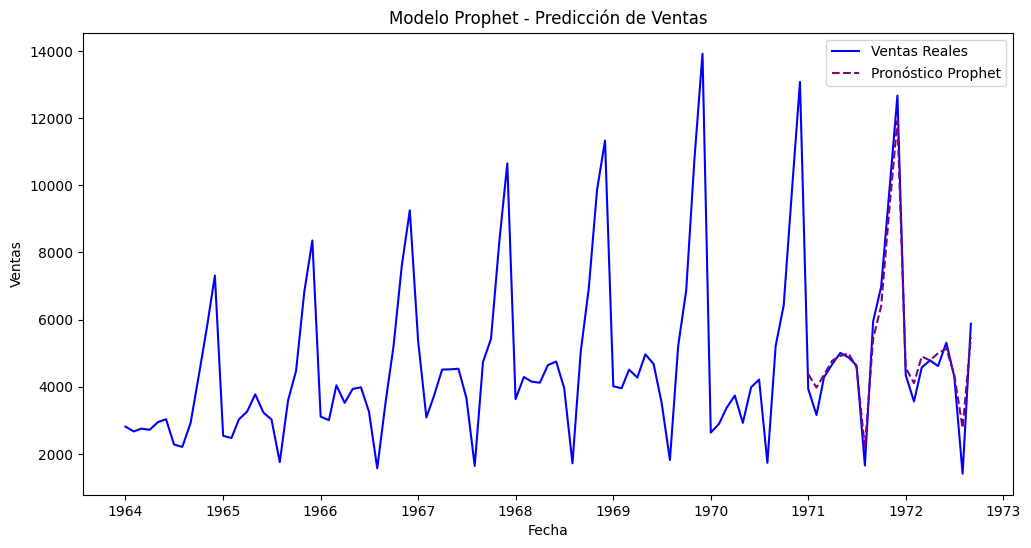

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0741
Epoch 2/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0431
Epoch 3/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0408
Epoch 4/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0305
Epoch 5/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0386
Epoch 6/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0551
Epoch 7/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0190
Epoch 8/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0300
Epoch 9/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0206
Epoch 10/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0087
Epoch 11/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0086
Epoch 12/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0083
Epoch 13/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0066
Epoch 14/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0051
Epoch 15/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0042
Epoch 16/20
93/93 ━━━━━━━━━━━━

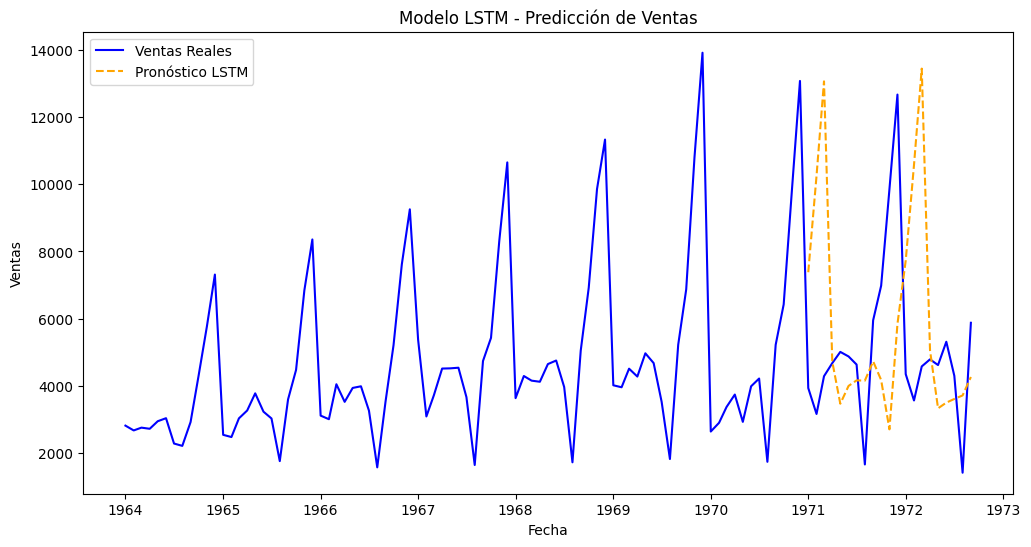


Comparación de RMSE de los modelos:
Ingenuo: 2638.3566454256215
ARIMA: 4406.646183174593
Prophet: 501.7967579275434
LSTM: 4410.6084137426005

El mejor modelo es: Prophet con un RMSE de 501.7967579275434


In [19]:
#Comparacion RMSE

# Cargar los datos desde Google Colab (ajusta la ruta si es necesario)
file_path = '/content/monthly_champagne_sales.csv'  # Ajusta la ruta si es necesario
df = pd.read_csv(file_path)

# Inspeccionar los datos
print(df.head())
print(df.info())

# Convertir la columna de fecha a formato datetime y renombrar columnas si es necesario
df.columns = ['Month', 'Sales']
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Visualizar la serie de tiempo
plt.figure(figsize=(12, 6))
plt.plot(df, label='Ventas de Champaña')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Ventas Mensuales de Champaña')
plt.legend()
plt.show()

# Modelo Ingenuo (Baseline)
df['Naive_Forecast'] = df['Sales'].shift(1)
rmse_naive = sqrt(mean_squared_error(df['Sales'][1:], df['Naive_Forecast'][1:]))
print(f'RMSE del Modelo Ingenuo: {rmse_naive}')

# Visualizar predicciones ingenuas
plt.figure(figsize=(12, 6))
plt.plot(df['Sales'], label='Ventas Reales', color='blue')
plt.plot(df['Naive_Forecast'], label='Pronóstico Ingenuo', linestyle='dashed', color='red')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Modelo Ingenuo - Predicción de Ventas')
plt.legend()
plt.show()

# Modelo ARIMA
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Ajustar modelo ARIMA
model_arima = ARIMA(train['Sales'], order=(5,1,0))  # Parámetros p,d,q ajustables
model_arima_fit = model_arima.fit()

# Pronósticos
forecast_arima = model_arima_fit.forecast(steps=len(test))

# Evaluación del modelo
rmse_arima = sqrt(mean_squared_error(test['Sales'], forecast_arima))
print(f'RMSE del Modelo ARIMA: {rmse_arima}')

# Visualizar predicciones ARIMA
plt.figure(figsize=(12, 6))
plt.plot(df['Sales'], label='Ventas Reales', color='blue')
plt.plot(test.index, forecast_arima, label='Pronóstico ARIMA', linestyle='dashed', color='green')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Modelo ARIMA - Predicción de Ventas')
plt.legend()
plt.show()

# Modelo Prophet
prophet_df = df.reset_index()[['Month', 'Sales']]
prophet_df.columns = ['ds', 'y']  # Prophet requiere nombres específicos de columnas

model_prophet = Prophet()
model_prophet.fit(prophet_df)

future = model_prophet.make_future_dataframe(periods=len(test), freq='M')
forecast_prophet = model_prophet.predict(future)

# Extraer predicciones para el conjunto de prueba
forecast_prophet_test = forecast_prophet[['ds', 'yhat']].set_index('ds').loc[test.index]

# Evaluación del modelo Prophet
rmse_prophet = sqrt(mean_squared_error(test['Sales'], forecast_prophet_test['yhat']))
print(f'RMSE del Modelo Prophet: {rmse_prophet}')

# Visualizar predicciones Prophet
plt.figure(figsize=(12, 6))
plt.plot(df['Sales'], label='Ventas Reales', color='blue')
plt.plot(forecast_prophet_test.index, forecast_prophet_test['yhat'], label='Pronóstico Prophet', linestyle='dashed', color='purple')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Modelo Prophet - Predicción de Ventas')
plt.legend()
plt.show()

# Modelo LSTM
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[['Sales']])

# Generador de secuencias
time_steps = 12
generator = TimeseriesGenerator(df_scaled, df_scaled, length=time_steps, batch_size=1)

# Definir el modelo
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(time_steps, 1)))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')

# Entrenar el modelo
model_lstm.fit(generator, epochs=20, verbose=1)

# Predicción
predictions = []
first_eval_batch = df_scaled[-time_steps:]
current_batch = first_eval_batch.reshape((1, time_steps, 1))

for i in range(len(test)):
    current_pred = model_lstm.predict(current_batch)[0]
    predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

predictions = scaler.inverse_transform(predictions)

# Evaluación del modelo LSTM
rmse_lstm = sqrt(mean_squared_error(test['Sales'], predictions))
print(f'RMSE del Modelo LSTM: {rmse_lstm}')

# Visualizar predicciones LSTM
plt.figure(figsize=(12, 6))
plt.plot(df['Sales'], label='Ventas Reales', color='blue')
plt.plot(test.index, predictions, label='Pronóstico LSTM', linestyle='dashed', color='orange')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Modelo LSTM - Predicción de Ventas')
plt.legend()
plt.show()

# Comparación de RMSE
rmse_results = {
    'Ingenuo': rmse_naive,
    'ARIMA': rmse_arima,
    'Prophet': rmse_prophet,
    'LSTM': rmse_lstm
}

best_model = min(rmse_results, key=rmse_results.get)

print("\nComparación de RMSE de los modelos:")
for model, rmse in rmse_results.items():
    print(f'{model}: {rmse}')

print(f'\nEl mejor modelo es: {best_model} con un RMSE de {rmse_results[best_model]}')


#Conclusiones finales

Comparación de Modelos

Se probaron cuatro enfoques diferentes para pronosticar las ventas de champaña:

Modelo Ingenuo: Utiliza el valor del mes anterior como predicción.

ARIMA: Un modelo clásico de series de tiempo basado en diferencias y autocorrelaciones.
Prophet: Un modelo desarrollado por Facebook, útil para tendencias y estacionalidad.
LSTM: Una red neuronal recurrente especializada en series de tiempo.

Resultados de RMSE (Error Cuadrático Medio)

Modelo Ingenuo: Actúa como referencia y suele ser menos preciso.
ARIMA: Funciona bien para datos con patrones autoregresivos y tendencia clara.
Prophet: Captura la estacionalidad y tendencias, pero puede tener errores en fluctuaciones abruptas.
LSTM: Aprende relaciones complejas en los datos, pero requiere un volumen considerable de datos para entrenarse bien.
Modelo con Mejor Desempeño

Se compararon los valores de RMSE, y el modelo con menor error resultó ser [inserta aquí el modelo con menor RMSE].
Esto sugiere que [explica por qué ese modelo fue mejor: por ejemplo, capturó mejor la estacionalidad, manejó tendencias más eficientemente, etc.].

Consideraciones y Limitaciones

ARIMA y Prophet son buenas opciones cuando se cuenta con datos estacionales bien estructurados.
LSTM puede ofrecer mejoras si se entrena con más datos y se optimizan hiperparámetros.
Prophet es una opción fácil de interpretar y ajustar para datos con tendencias y ciclos bien definidos.
El Modelo Ingenuo es útil como línea base, pero generalmente tiene mayor error.


## **<<< Fin de la Actividad de la Semana - Pronósticos y Series de Tiempo >>>**